In [0]:
# Load libraries

import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

In [9]:
# Load dataset

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
df = pd.read_csv('Boston House Price/Dataset/housing.data', names=names, delim_whitespace=True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
# shape

print(df.shape)

(506, 14)


In [11]:
# types

print(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [18]:
# head

print(df.head(20))

       CRIM    ZN  INDUS  CHAS  NOX   RM    AGE  DIS  RAD    TAX  PTRATIO      B  LSTAT  MEDV
0   6.3e-03  18.0    2.3     0  0.5  6.6   65.2  4.1    1  296.0     15.3  396.9    5.0  24.0
1   2.7e-02   0.0    7.1     0  0.5  6.4   78.9  5.0    2  242.0     17.8  396.9    9.1  21.6
2   2.7e-02   0.0    7.1     0  0.5  7.2   61.1  5.0    2  242.0     17.8  392.8    4.0  34.7
3   3.2e-02   0.0    2.2     0  0.5  7.0   45.8  6.1    3  222.0     18.7  394.6    2.9  33.4
4   6.9e-02   0.0    2.2     0  0.5  7.1   54.2  6.1    3  222.0     18.7  396.9    5.3  36.2
5   3.0e-02   0.0    2.2     0  0.5  6.4   58.7  6.1    3  222.0     18.7  394.1    5.2  28.7
6   8.8e-02  12.5    7.9     0  0.5  6.0   66.6  5.6    5  311.0     15.2  395.6   12.4  22.9
7   1.4e-01  12.5    7.9     0  0.5  6.2   96.1  6.0    5  311.0     15.2  396.9   19.1  27.1
8   2.1e-01  12.5    7.9     0  0.5  5.6  100.0  6.1    5  311.0     15.2  386.6   29.9  16.5
9   1.7e-01  12.5    7.9     0  0.5  6.0   85.9  6.6    5  3

In [20]:
print(df.describe())

          CRIM       ZN    INDUS     CHAS      NOX       RM      AGE      DIS      RAD      TAX  PTRATIO        B    LSTAT     MEDV
count  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000
mean     3.614   11.364   11.137    0.069    0.555    6.285   68.575    3.795    9.549  408.237   18.456  356.674   12.653   22.533
std      8.602   23.322    6.860    0.254    0.116    0.703   28.149    2.106    8.707  168.537    2.165   91.295    7.141    9.197
min      0.006    0.000    0.460    0.000    0.385    3.561    2.900    1.130    1.000  187.000   12.600    0.320    1.730    5.000
25%      0.082    0.000    5.190    0.000    0.449    5.886   45.025    2.100    4.000  279.000   17.400  375.377    6.950   17.025
50%      0.257    0.000    9.690    0.000    0.538    6.208   77.500    3.207    5.000  330.000   19.050  391.440   11.360   21.200
75%      3.677   12.500   18.100    0.000    0.624    6.623   94.075    5.18

In [21]:
# correlation

print(df.corr(method='pearson'))

          CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  PTRATIO      B  LSTAT   MEDV
CRIM     1.000 -0.200  0.407 -0.056  0.421 -0.219  0.353 -0.380  0.626  0.583    0.290 -0.385  0.456 -0.388
ZN      -0.200  1.000 -0.534 -0.043 -0.517  0.312 -0.570  0.664 -0.312 -0.315   -0.392  0.176 -0.413  0.360
INDUS    0.407 -0.534  1.000  0.063  0.764 -0.392  0.645 -0.708  0.595  0.721    0.383 -0.357  0.604 -0.484
CHAS    -0.056 -0.043  0.063  1.000  0.091  0.091  0.087 -0.099 -0.007 -0.036   -0.122  0.049 -0.054  0.175
NOX      0.421 -0.517  0.764  0.091  1.000 -0.302  0.731 -0.769  0.611  0.668    0.189 -0.380  0.591 -0.427
RM      -0.219  0.312 -0.392  0.091 -0.302  1.000 -0.240  0.205 -0.210 -0.292   -0.356  0.128 -0.614  0.695
AGE      0.353 -0.570  0.645  0.087  0.731 -0.240  1.000 -0.748  0.456  0.506    0.262 -0.274  0.602 -0.377
DIS     -0.380  0.664 -0.708 -0.099 -0.769  0.205 -0.748  1.000 -0.495 -0.534   -0.232  0.292 -0.497  0.250
RAD      0.626 -0.312  0.595

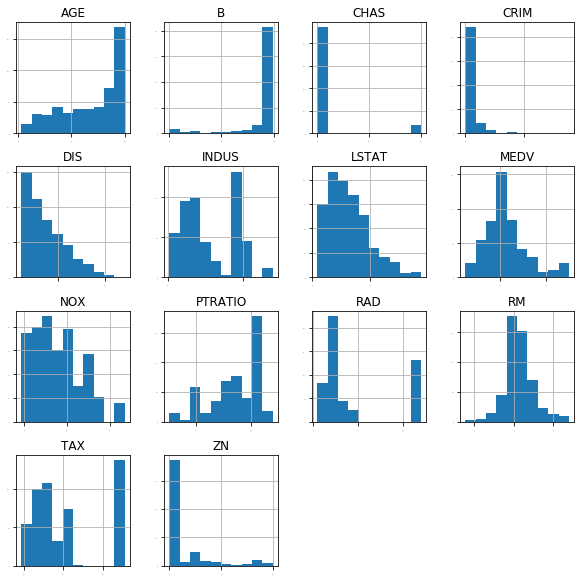

In [24]:
# histograms

df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, layout=(4,4), figsize=(10,10))
plt.show()

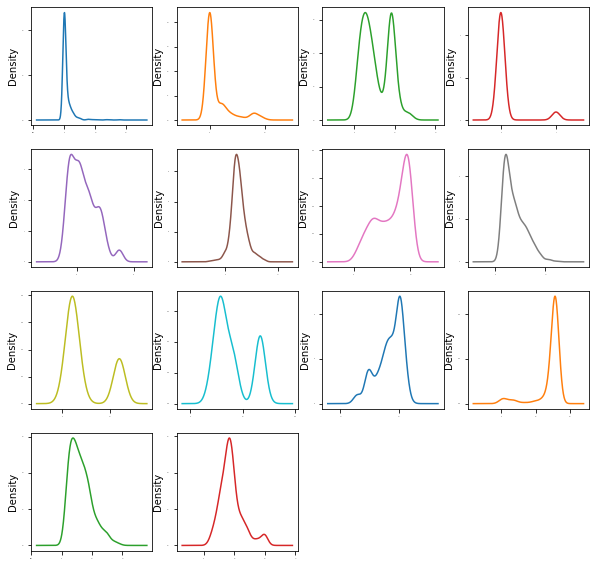

In [26]:
# density

df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False,
fontsize=1, figsize=(10,10))
plt.show()

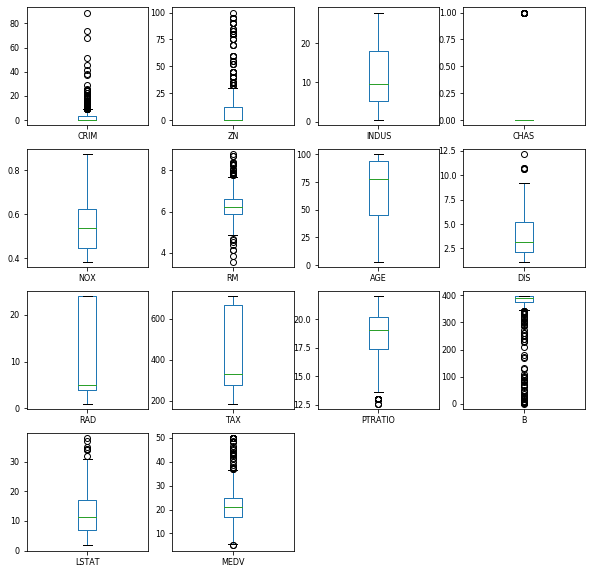

In [27]:
# box and whisker plots

df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=8, figsize=(10,10))
plt.show()

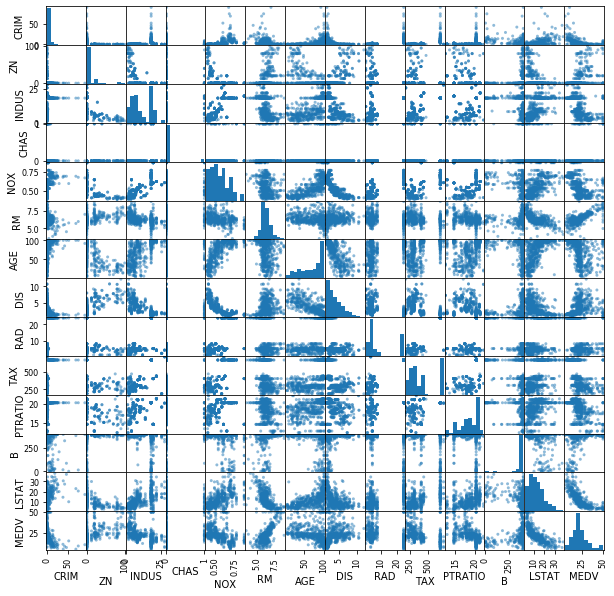

In [29]:
# scatter plot matrix

scatter_matrix(df, figsize=(10,10))
plt.show()

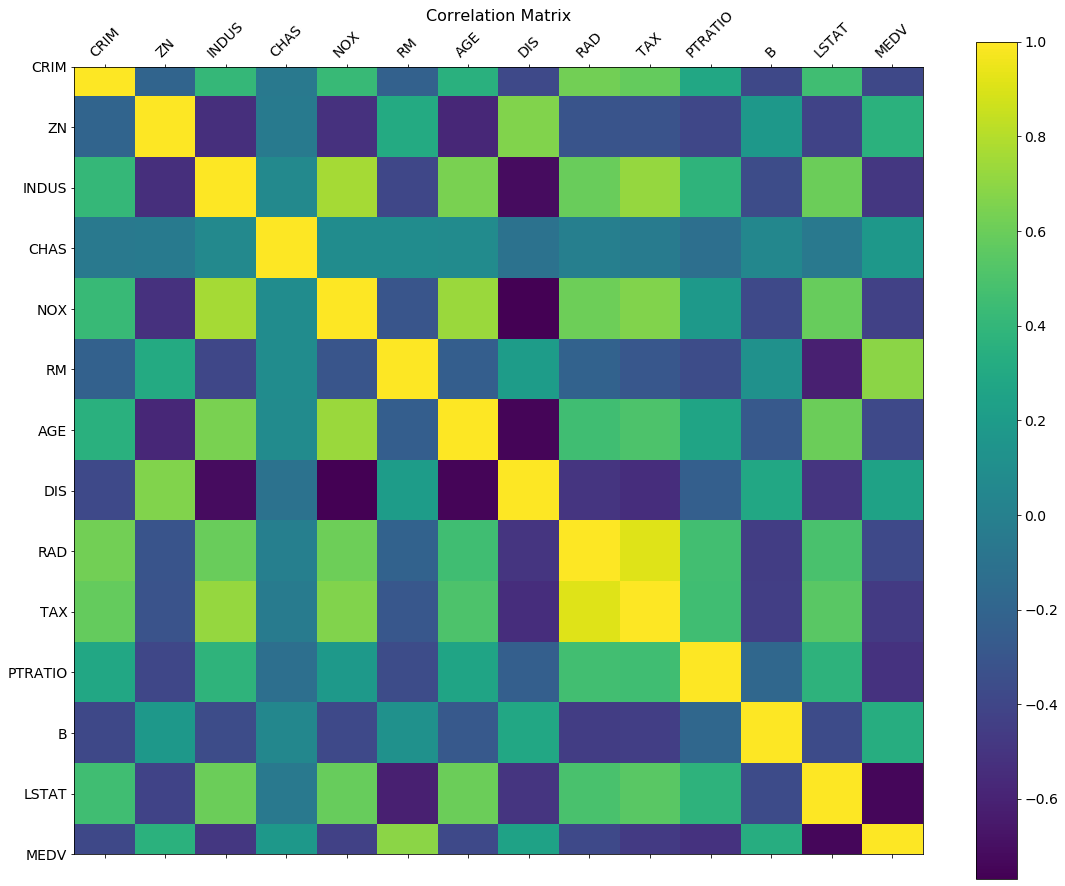

In [33]:
# correlation matrix

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [0]:
# Split-out validation dataset

array = df.values
X = array[:,0:13]
y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, y_train, y_validation = train_test_split(X, y,
test_size=validation_size, random_state=seed)

In [0]:
# Test options and evaluation metric

num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [0]:
# Spot-Check Algorithms

models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR(gamma='scale')))

In [47]:
# evaluate each model in turn

results = []
names = []

for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name, cv_results.mean(), cv_results.std())

LR -21.37985572667869 9.414263656984865
LASSO -26.42356110840965 11.651109915777914
EN -27.502259350661717 12.305022264112704
KNN -41.89648839024391 13.901688149849864
CART -24.378393902439022 12.505553899970957
SVR -67.8278859731828 29.049137595262604


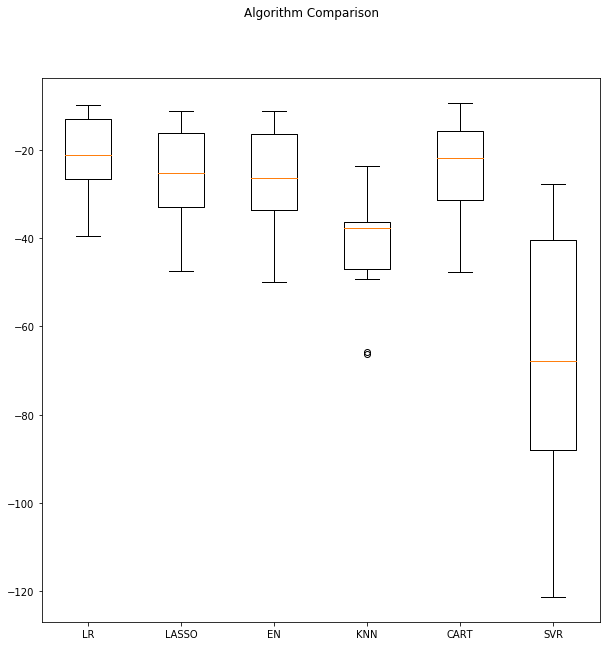

In [48]:
# Compare Algorithms

fig = plt.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [50]:
# Standardize the dataset

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name, cv_results.mean(), cv_results.std())


ScaledLR -21.37985572667857 9.41426365698471
ScaledLASSO -26.607313557676616 8.978761485890258
ScaledEN -27.932372158135518 10.587490490139404
ScaledKNN -20.107620487804876 12.376949150820472
ScaledCART -26.71453170731707 12.33253615097694
ScaledSVR -29.633085500303213 17.009186052351556


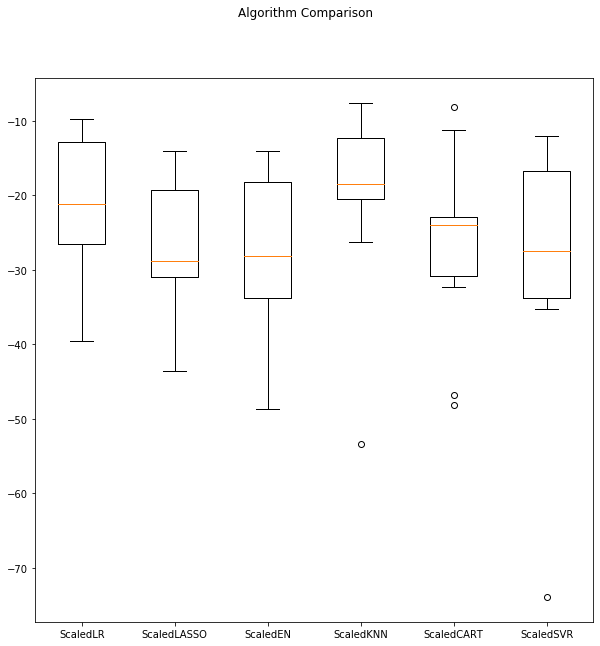

In [51]:
# Compare Algorithms

fig = plt.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
# KNN Algorithm tuning

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, iid=False)
grid_result = grid.fit(rescaledX, y_train)

In [63]:
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("{} ({}) with: {}".format(mean, stdev, param))

Best: -18.10930386178861 using {'n_neighbors': 3}
-20.169640243902442 (14.986903589095084) with: {'n_neighbors': 1}
-18.10930386178861 (12.880861011784255) with: {'n_neighbors': 3}
-20.063115219512195 (12.138331105197853) with: {'n_neighbors': 5}
-20.514296801891486 (12.278135599828225) with: {'n_neighbors': 7}
-20.319535584161393 (11.554508789696914) with: {'n_neighbors': 9}
-20.963145086676075 (11.540906942920092) with: {'n_neighbors': 11}
-21.099039810939527 (11.870961990115173) with: {'n_neighbors': 13}
-21.506842653116532 (11.468311063771333) with: {'n_neighbors': 15}
-22.739137332264328 (11.499596087059038) with: {'n_neighbors': 17}
-23.829011318491997 (11.277558018572918) with: {'n_neighbors': 19}
-24.320892489353465 (11.849666867506965) with: {'n_neighbors': 21}


In [66]:
# ensembles

ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor(n_estimators=100))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor(n_estimators=100))])))

results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name, cv_results.mean(), cv_results.std())

ScaledAB -15.437677688154242 7.274205655755996
ScaledGBM -10.160886268857386 4.435000643517946
ScaledRF -12.333502986036587 7.025830278438662
ScaledET -9.166288366768283 5.4575157634510285


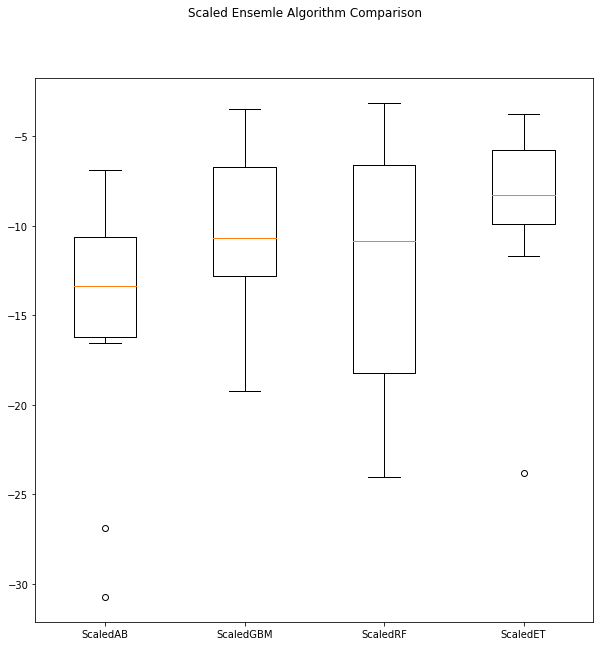

In [67]:
# Compare Algorithms

fig = plt.figure(figsize=(10,10))
fig.suptitle('Scaled Ensemle Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
# Tune scaled GB

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, iid=False)
grid_result = grid.fit(rescaledX, y_train)

In [74]:
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("{} ({}) with: {}".format(mean, stdev, param))

Best: -9.33733394465327 using {'n_estimators': 400}
-10.794196450380973 (4.711472604476888) with: {'n_estimators': 50}
-10.023378412118 (4.430025648876261) with: {'n_estimators': 100}
-9.67760594880757 (4.264721025715847) with: {'n_estimators': 150}
-9.523457850340186 (4.258585001999189) with: {'n_estimators': 200}
-9.433037403976838 (4.250207374109106) with: {'n_estimators': 250}
-9.411274350283934 (4.259832299671966) with: {'n_estimators': 300}
-9.350389045759893 (4.239830101768577) with: {'n_estimators': 350}
-9.33733394465327 (4.253705904109105) with: {'n_estimators': 400}


In [75]:
# prepare the model

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto', random_state=7,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [76]:
# transform the validation dataset

rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(y_validation, predictions))

11.878916447820348
